# Further Closure:  
## A final project on simulating something "like electrons and positrons"

## Objectives:

* Gain familiarity with simulating quantum systems through trotterization
* Using all your accrued skills, implement a novel code on a real device
* Perform statistical analysis on noisy data

This lab is a vain attempt to extend some of the work performed in BLARG to actual machines. I have tried to inject this with as much of the real feel of doing work on quantum algorithms today as possible.  

## The Model: 1+1d $Z_2$ gauge theory with staggered fermionic matter

## The Hamiltonian

The lattice qubit Hamiltonian for this model is

$$
H = \frac{m}{2}Z_{e}-\frac{m}{2} Z_{p}
+X_{\gamma}+\frac{1}{4}Z_{\gamma} \left(X_{e}X_{p}+Y_e Y_{p}\right)
$$

The subscripts indicate which of the 3 qubits a given gate is acting on (the electron $e$, the positron $p$, or the photon $\gamma$)

## Time Evolution

$$ |\psi(t)\rangle = U|\psi_0\rangle=e^{-iHt}|\psi_0\rangle$$

Thinking back to Hersh's lecture, we remember that $H$ often has non-commuting terms, which prevents the gate $U$ from being efficiently built into a circuit.  The method of _trotterization_ allows us approximate the $U$ in a way that is efficient.  In our case, there are 3 terms in our Hamiltonian:

$$ H = H_{kg} + H_{fh} + H_{m} $$

* $H_{kg}$ is the kinetic term for the photon
* $H_{fh}$ is the fermionic hopping term
* $H_{m}$ is the fermionic mass terms

In this case, we can approximate $U$ by:

$$\Large U=e^{-iHt}\approx \left(e^{-iH_{kg}\epsilon}e^{-iH_{fh}\epsilon}e^{-iH_{m}\epsilon}\right)^{t/\epsilon}+O(\epsilon^2)\equiv (U_\epsilon)^{N} $$
where $N=t/\epsilon$ is the number of time steps we want to use. With this, we can now write $U_\epsilon$ in terms of gates:

$$\Large{ U_{\epsilon}=e^{-iH_{kg}\epsilon}e^{-iH_{fh}\epsilon}e^{-iH_{m}\epsilon}
\\     =e^{-i\epsilon X_\gamma}e^{-i\frac{\epsilon}{4}Z_{\gamma} \left(X_{e}X_{p}+Y_e Y_{p}\right)}e^{-i(-1)^j m \epsilon Z_j} }$$
where $j={e=0,p=1}$
Now, the first and last gates should look familar to you as general rotation gates in the $X,Z$ directions:

$${ e^{-i\epsilon X_\gamma}=RX(-\epsilon/2)
    \\e^{-i(-1)^j m \epsilon Z_j}=RZ((-1)^{j+1}m\epsilon ) } $$

The final term, fermion hopping $U_{fh}$, is by far the hardest and most non-trivial gate.  Previously, you implemented a 4 qubit gate for performing this by defining a gate $RZ3$ as the collection of CNOTs and the $RZ$ gate, this gate looks like:

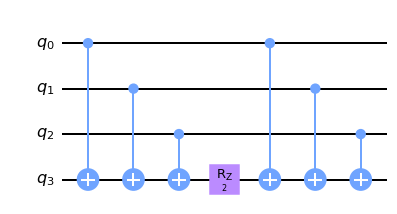

from which we can get the $U_{fh}$ as:

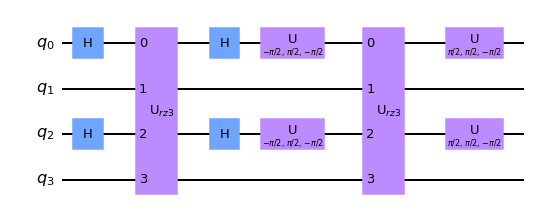

Notice that this gate requires 12 $CNOTs$.  Since 2-qubit gates errors are much larger than 1 qubit errors, the errors in $U_{fh}$ dominate our circuit.

We will come back to this.


## ...Ready for it? 

So first of, lets of course set up all the imports that we need:

* numpy
* import everything from qiskit
* import `matplotlib.pyplot` as plt
* Make sure you have $\pi$

Next, you neeed to load your IBMQ account, and set your provider to our `qjs-for-hep` project.  Finally, use the command

    provider.backends()
to look at all the computers 'available' to you (Note, 'ibmq_16_melbourne' isn't actually accessible)

Keep this list for later

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q-education', group='fermilab-1', project='qjs-for-hep')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q-education', group='fermilab-1', project='qjs-for-hep')>,
 <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q-education', group='fermilab-1', project='qjs-for-hep')>,
 <IBMQBackend('ibmq_bogota') from IBMQ(hub='ibm-q-education', group='fermilab-1', project='qjs-for-hep')>,
 <IBMQBackend('ibmq_casablanca') from IBMQ(hub='ibm-q-education', group='fermilab-1', project='qjs-for-hep')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q-education', group='fermilab-1', project='qjs-for-hep')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q-education', group='fermilab-1', project='qjs-for-hep')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q-education', group='fermilab-1', project='qjs-for-hep')>,
 <IBMQBackend('ibmq_jakarta') from IBMQ(hub='ibm-q-education', group='fermilab-1', project='qjs-for-hep')>,
 <IBMQBackend('ibmq_mani

Copy over from yesterday your initalization of `N,epsilon`, and `mass`

## Gauge Kinetic Gate
Copy over your function for $RX(-\epsilon/2)$

## Fermion mass gate

Copy over your function for $RZ((-1)^{j+1}m\epsilon ) $

## Fermion hopping term

Copy over your functions for $RZ3$ and $U_{fh}$

As I highlighted for you before, this gate takes 12 CNOTs and 4 qubits even though we only need 3 qubits for our model.  This particular implementation of $U_{fh}$ that you have constructed is in fact not the smartest way one could implement this gate -- but it was the first one that I found years ago and used for a long time.  

Later, smarter people (like Erik perhaps) pointed out that you can do away with the ancilla qubit.  One possible 3 qubit implementation is given in the next cell which also only requires 6 CNOTS

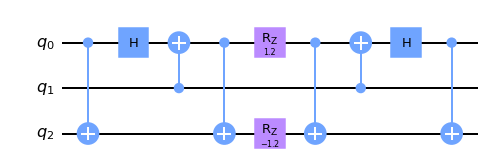

In [10]:
qreg_q = QuantumRegister(3, 'q')

circuit = QuantumCircuit(qreg_q)

circuit.cx(0,2)
circuit.h(0)
circuit.cx(1,0)
circuit.cx(0,2)
circuit.rz(1.2,0)
circuit.rz(-1.2,2)
circuit.cx(0,2)
circuit.cx(1,0)
circuit.h(0)
circuit.cx(0,2)

circuit.draw()

Write some code in the next cell for a function `def fermion_hopping_opt2` that implements the better circuit.

Better check you have properly implemented this with a decompose and a draw()

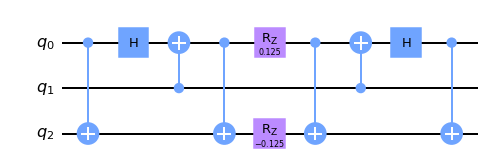

Now, lets try and repeat the experiment of comparing the the simulated results to the real machine for a $|+++\rangle$ state.  Unlike the previous circuit, you don't need 4 qubits and 4 classical bits, but only 3 of each.

Job Status: job has successfully run
Job Status: job has successfully run


Plot your results versus the simulated data.  How does this circuit do compared to the old, 4 qubit 12 CNOT one?  Are you feeling powerful yet?

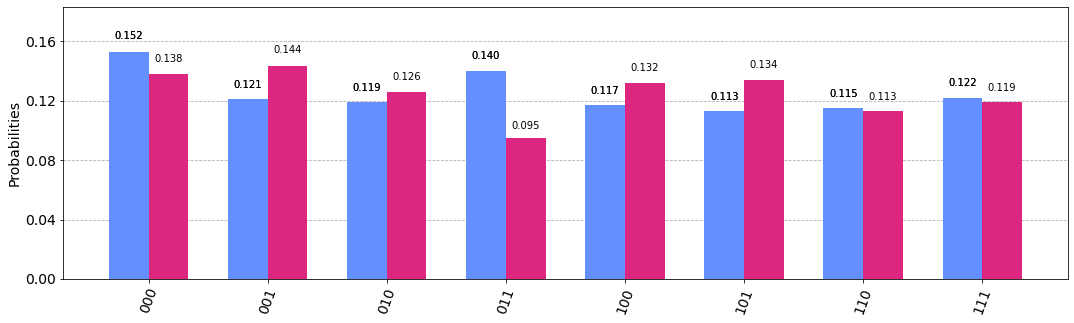

In order to extract physics from this simulation, we need to take the qubits and convert them into a meaningful number.  For this lab, we are going to extract the mean electron number as a function of time.  To do this, define a function `get_mean_fermion_number(counts)` which takes in the dictionary of counts of a run and determines the mean number of electrons by counting the lowest qubit.  

In [56]:
#define your function to take in a dictionary counts
def get_mean_fermion_number(counts):
    #first define a variable mean and set to 0
  
    #define a variable total_counts = sum(counts.values())
   
    #perform a for loop over the elements in counts, using for example `s` as the loop variable
   
        #define a variable p which is the last element of the identifier in your loop variable
        #i.e. p = s[-1]
      
        #check if p is a `1`.
      
            #if p == '1', then add to mean counts[s]/total_counts
            

In order to understand how badly we are doing with our real device results, we need to be computing some kind of statistical error bars, so that we can distinguish meaningful disagreement with the exact results from fluctuations from sampling.  To do this, we will employ the _bootstrap method_ which is similar to the replica method that you were introduced to long ago during the Monte Carlo lab.  Lets implement that next:

In [57]:
#define a function `get_bootstrap_error(counts)` which takes in a dictionary `counts`

    #compute the nshots by using sum(counts.values())
   
    #For our statistics, we will resample the distribution 100 times, so set B=100
 
    #Extract the list of unique keys in your dictionary and store them as a variable k via
    # k = list(counts.keys())
  
    #For each key, we need to define a probability list prob via [counts[a]/nshots for a in k]
   
    #define an empty array means
    
    #With all this setup, now perform a for loop over b in range(B)
 
        #set a variable m=0
       
        #build a new set of samples using numpy.random.choice with the arguments k, size=nshots, and p=prob
        #this function will return nshots worth of new results with probability prob from the choices in k

        #make a for loop over s in the list samples

            #set a new variable p = s[-1] to again extract the number of electrons
       
            #check if p = `1`
           
                #add 1/nshots to m if true
            
        #append the results of m to means
     
    #return from the function the standard deviation of means via numpy.std(means)   


At this point, we have made all of the functions we need to run the code, and produce a time-evolution simulation.  So on to the main event:

* Define a bunch of empty list: `counts`, `sim_counts`, `means`, `errs`, `sim_means`, `sim_errs` and `Ts`
* Besides the above code, everything else should be within a for-loop in `T` over the `range(int(3/epsilon))` which will loop over the total integer time `T`.  The real total time is $\epsilon T$
* At the beginning of each step, append `T` to `Ts`
* Create a QuantumCircuit with enough qubits and classical bits to run using `fermion_hopping_opt2`.  Remember the number of fermions is stored as $N$.
* In order to do time-evolution of a state $|\psi(t)\rangle$, we need to define the initial state.  For us, lets use $H_0X_0|000\rangle$ as our initial state. The subscripts indicate which qubit the gates act on.
* Within the $T$ loop, we need another loop over $t$ which ranges from 0 to $T$.  This will be used to add the appropriate number of gates for the number of trotter steps $t$ taken.

Within the $t$ loop, you will need 3 loops:
 1. Loop over all fermions (Hint, this is not a simple range function but should step by 2). Appending to your circuit the fermion mass gate with parameters `epsilon`, `mass`, and for eta one should send in $(-1)^{n/2+1}$ where $n$ is the loop variable.
 2. Loop over all the photons (Hint, this is not a simple range function but should step by 2).  Append to your circuit `gauge_kinetic` with `epsilon`
 3. Loop over all electrons (Hint this loop should have the same step as the fermion loop, but should terminate 2 qubits earlier
 
 This completes time evolution.  Within your for-loop, you should set up a simulator and real machine backend, and run both together. Transpile them, and run.  Within the for-loop, add 
 
    sim_means.append(get_mean_fermion_number(sim_counts[T]))  
    means.append(get_mean_fermion_number(counts[T]))  
    
    sim_errs.append(get_bootstrap_error(sim_counts[T]))
    errs.append(get_bootstrap_error(counts[T]))
    
So that you can use that data to make plots and compare.  As a final thing, print out     `T*epsilon, sim_means[T], sim_errs[T], means[T], errs[T]` at each time step to get the numbers instantly. They should agree to some rough amount depending on your errors.

In [ ]:
# Define all of your empty arrays


#Make the for loop over 0 to T

    #Append Ts and create your circuit

    #state prep!

    #time evolution
 
     #perform measurements
    qc.measure(range(3), range(3))

    #get a backend and transpile

    # use this command to see how many gates your circuit takes
    print(tc.count_ops())

    
    #run your circuit and get results


    #print(result.get_counts()) 
    #plot_histogram(counts).show()
    
    #append your results to arrays for the mean and bootstrapped errors
  
    #print out your results as a function of T

At this point, contact a lab instructor to come check your code, because the last step is to extend the time step from $1/\epsilon$ to $3/\epsilon$.  This will require many more calls to the real device, so it could take a while.

After your done, run the next cell.  It should plot the simulator results vs the real device.  How did you do?  Do they agre e within errors everywhere?  Do they start getting worse?

<ErrorbarContainer object of 3 artists>

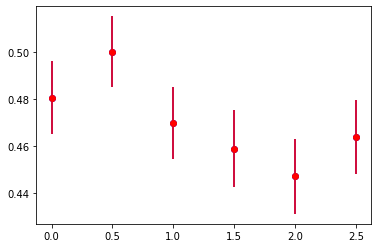

In [35]:
plt.errorbar(Ts, sim_means , yerr=sim_errs, ls='', marker='o', color='b')
plt.errorbar(Ts, means , yerr=errs, ls='', marker='o', color='r')

For those of us in High Energy Physics, there is something interesting in this plot.  We earlier discussed that a state will oscillate like $e^{-i E t}|\psi_0\rangle$.  If you take the right combination of observables, you would get a sin(Et) or cos(Et).  In this case, measuring the frequency of the wave tells you the energy of the state you have prepared.  Can you extract a fit to your data and derive a value of the energy?

A good reference for how one might implement such a function is https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html, although you need to import scipy to make it work.  The functional form you will want to fit is $A*sin(B*t+C)$, and the resulting $B$ would be an estimate of the energy.